# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
path="drive/MyDrive/AIML/FoodHub"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
df = pd.read_csv(path+'/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head(5)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape


(1898, 9)

#### Observations:
1898 rows and 9 columns present

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


There 1898 non null values present in each of the cloumns

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

There are no missing values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

* Order Id and Customer Id are the identifiers for each order
* The cost of an order is between 4.47 to 35.41 dollars, average 16 dollars and standard
* Food preparation time is from 20 to 35 minutes, with an average of around 27 mins and standard deviation of 4.6 minutes
* Delivery time ranges from 15 to 33 mins, with average of around 24 mins and standard deviation is 5 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

Ratings are not given on 736 orders


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

Observation
* there are 1898 unique orders

####Customer ID

In [ ]:
# check unique customer id
df['customer_id'].nunique()

1200

#### Restaurant Name

In [ ]:
# check restrurant name
df['restaurant_name'].nunique()

178

Observation
* There are 1200 unique customers

####cuisine_type

In [ ]:
# check cuisine type
df['cuisine_type'].nunique()

14

Observation

* There are 14 unique cuisine type

#### Day_of_the_week

In [ ]:
# check day of the week
df['day_of_the_week'].nunique()

2

Observation
* There are 2 days of the week

####Rating

In [ ]:
# check rating
df['rating'].nunique()

4

Observation
* There are 4 unique ratings

#### Food_preparation_time

In [ ]:
df['food_preparation_time'].nunique()

16

Observation

* There are 16 unique food prepartion time

#### delivery_time

In [ ]:
# check delivery time
df['delivery_time'].nunique()

19

There are 19 unique delivery time

#### cuisine_type

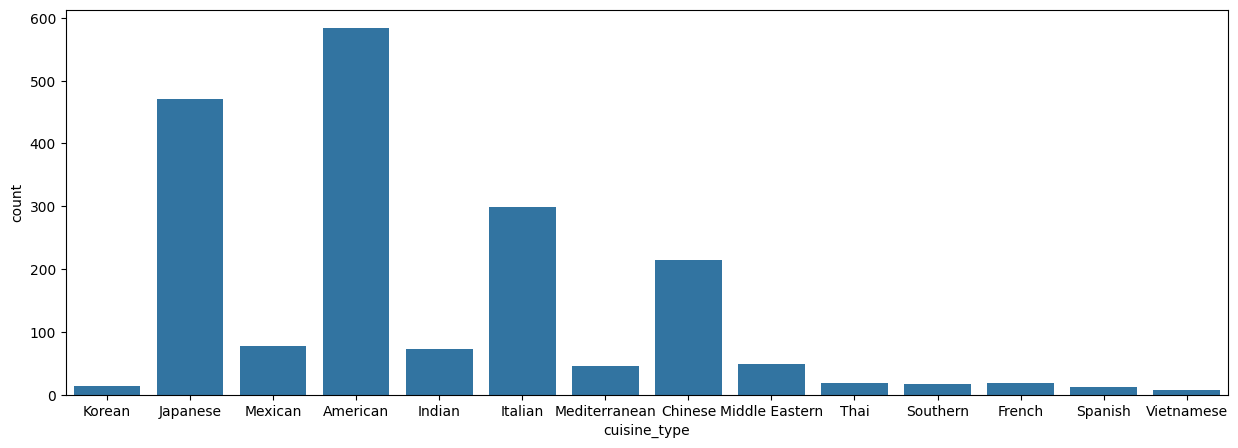

In [ ]:
# check cuisine type
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')
plt.show()

Observations

* There are 14 unique cuisine types
* Most frequent cuisine type is american
* Cuisine types are not distributed
* Vietnamese is least popular cuisine

#### cost_of_the_order

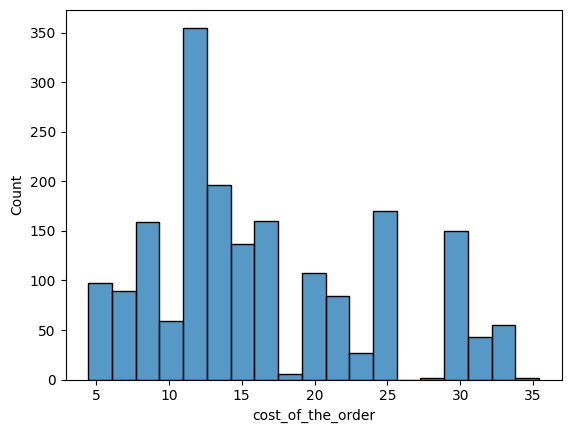

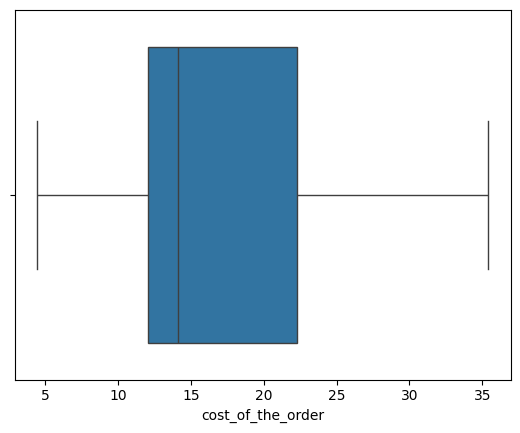

In [ ]:
# check cost of order
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

sns.boxplot(data=df,x='cost_of_the_order')
plt.show()



#### Day of the week

['Weekend' 'Weekday']


<Axes: xlabel='day_of_the_week', ylabel='count'>

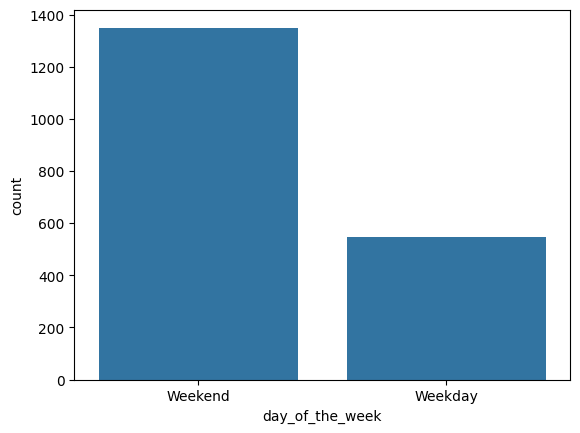

In [ ]:
# Check the unique values
df['day_of_the_week'].unique()
unique_days = df['day_of_the_week'].unique()
print(unique_days)

# Plot the countplot
sns.countplot(data = df, x = 'day_of_the_week')

Observation

* Most of the orders are placed on weekends

#### Rating

['Not given' '5' '3' '4']


<Axes: xlabel='rating', ylabel='count'>

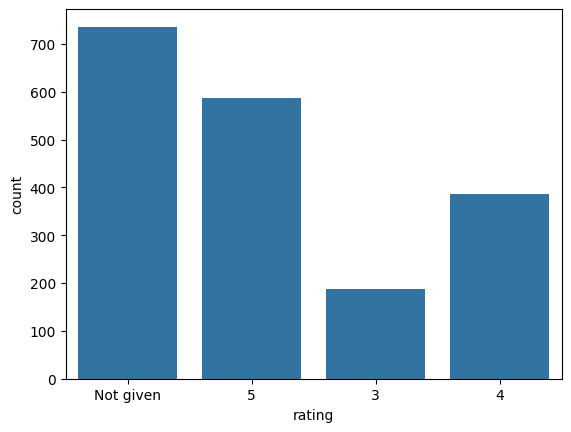

In [ ]:
#Check the unique values
print (df['rating'].unique())

# Plot the countplot

sns.countplot(data = df, x = 'rating')

Observation

* Rating of "Not Given" is highest followed by 5


#### Food Preparation time

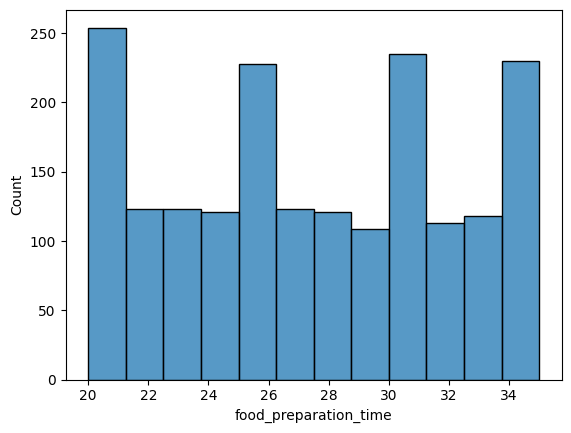

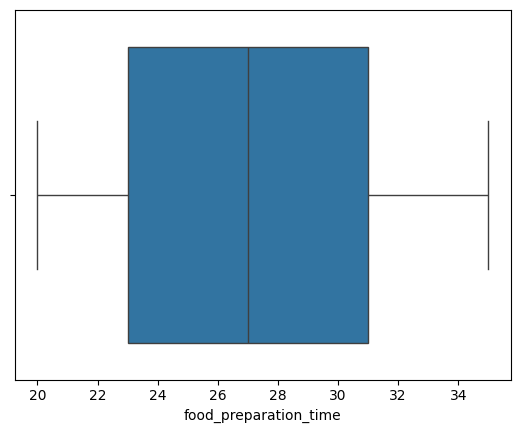

In [ ]:
# Check food preparation time
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

Observation

* Food preparation time distributed between 20 to 35 and no outliers
* Food prepartion time distribution is pretty symetrical


#### Cost Of Order

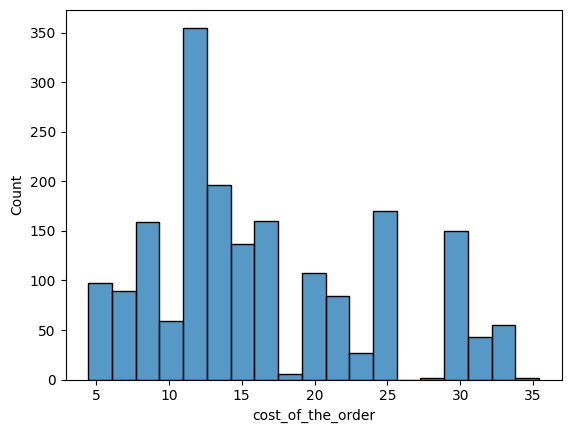

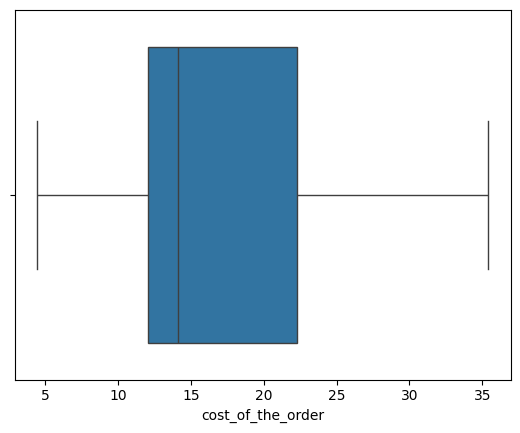

In [ ]:
# check cost of order
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Delivery time

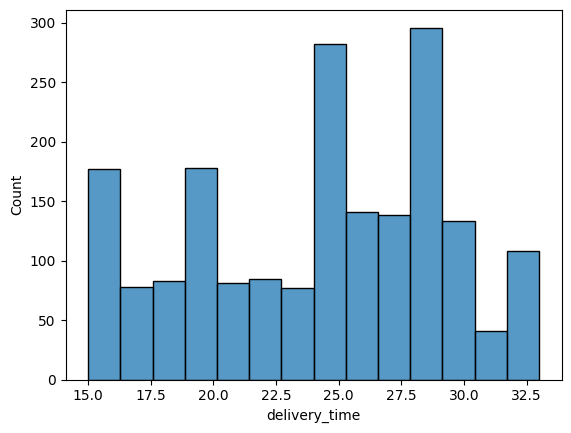

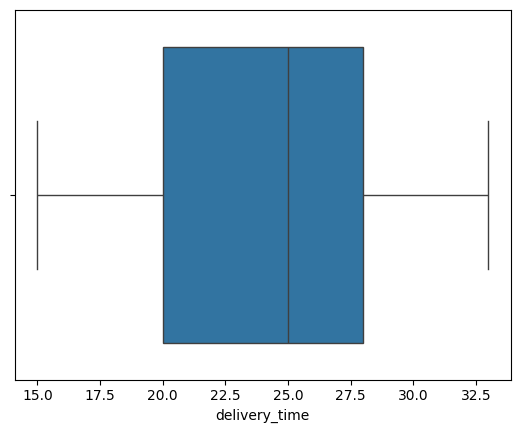

In [ ]:
#Check delivery time
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

Observation

* Average delivery time is smaller than median delivery time indicating that the distribution is left skewed
* Order have delivery time between 24 to 30
* There are no outliers

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* Shake Shack is the most ordered restrurants followed by The Meatball shop , Blue Ribbon Sushi, Blue Ribbon Frided Chicken.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
American cuisine is most popular cuisine in weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100

29.24130663856691

#### Observation
Percentage of order is arround 29.24

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
Delivery time is arround 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Customer Id 52832 has 13 orders placed


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs Cost of the order


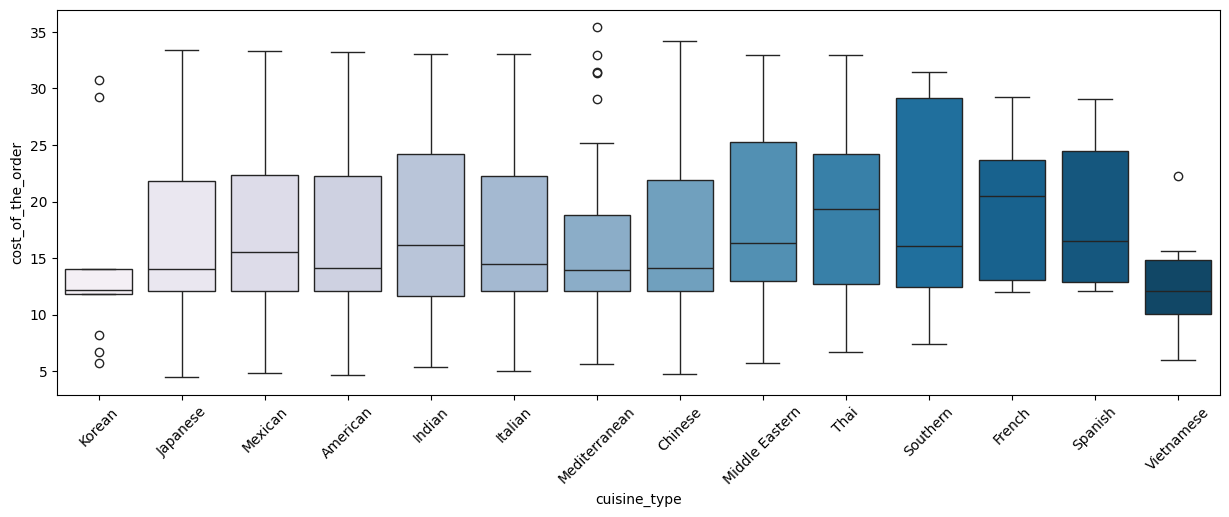

In [ ]:
# Cuisine vs cost of order
plt.figure(figsize=(15,5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 45)
plt.show()

Observation

* Outlier present for Korian Cuisine
* Median is between 24 to 30 mins for all cuisine
* Korean food takes less time

#### Cuisine vs Food Preparation time


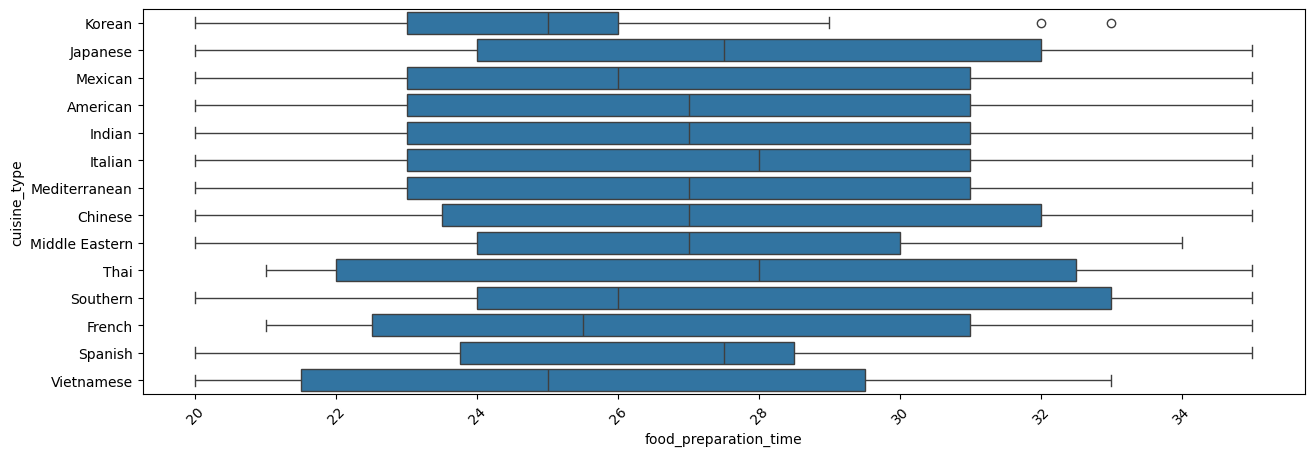

In [ ]:
# Relation between Food preparation time and cuisine type
plt.figure(figsize=(15,5))
sns.boxplot(x='food_preparation_time', y='cuisine_type', data=df)
plt.xticks(rotation = 45)
plt.show()

Observation

* Boxplot for Italian, American,Chinese,Japanese cuisines are similar.
* Vietnamese and Korean cuisines cost less than others
* Outliers are present for Korean,Mediterran and Vietnamese cuisine
* French and Spanish cuisines are costlier


#### Day of the Week vs Delivery time

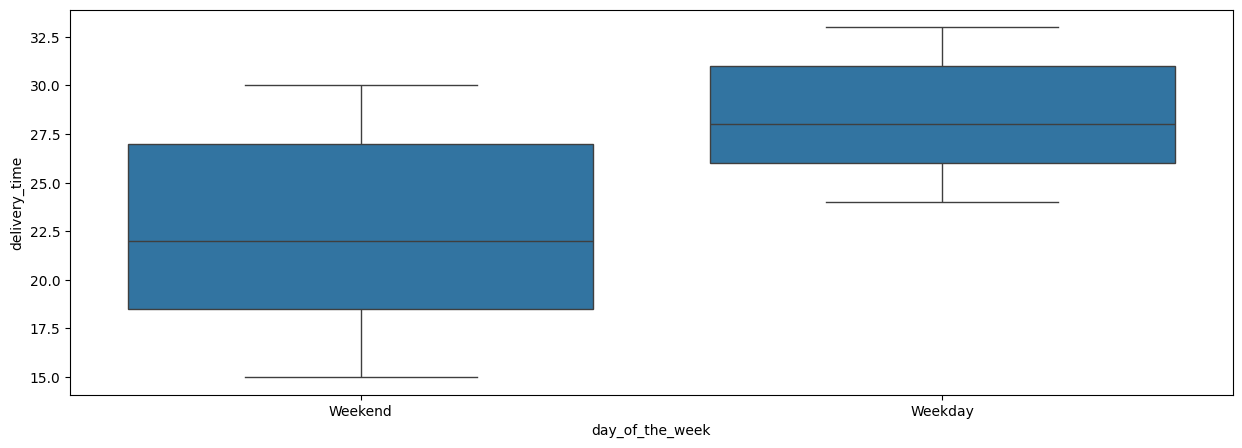

In [ ]:
# Plot between Day of the week and delivery time
plt.figure(figsize=(15,5))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.xticks(rotation = 0)
plt.show()

Observation

* Delivery time is less in weekends

#### Revenue by restaurants

In [ ]:
# Revenue by restaurants
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

Observation

* Shake shack has most of the orders followed by The Meatball Shop, Blue Ribbib Sushi etc.

* Restrurants are generating more than 500 dollars revenue


#### Rating vs Delivery time

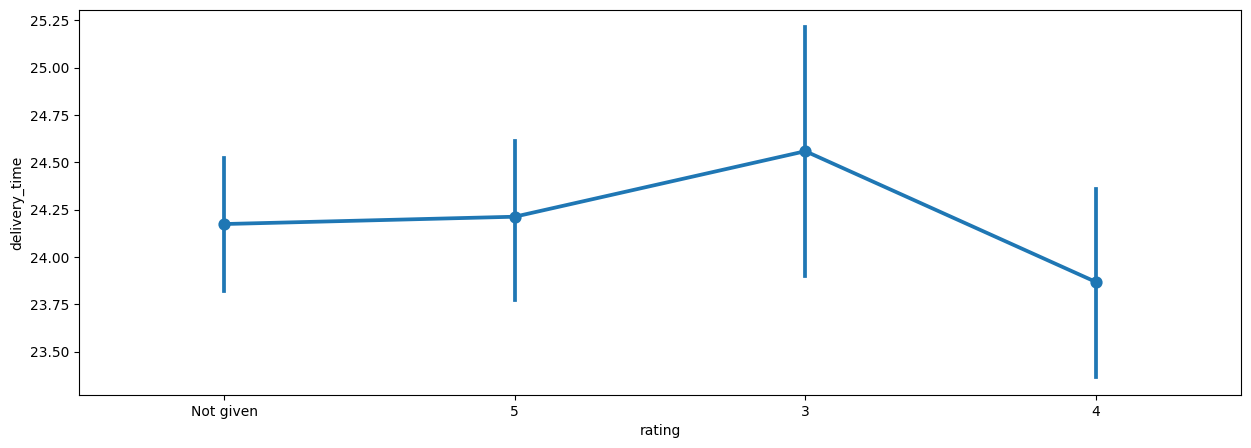

In [ ]:
# Rating vs delivery time
plt.figure(figsize=(15, 5))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Observation

* Food preparation time not contributing to raings

#### Rating vs Food preparation time

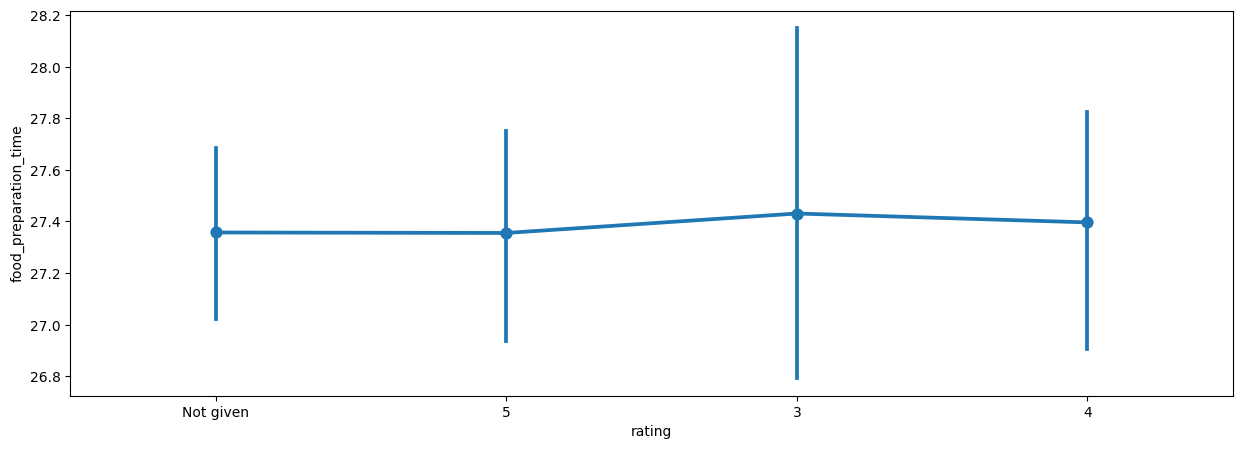

In [ ]:
# Rating vs food preparation time
plt.figure(figsize=(15, 5))
sns.pointplot(x='rating', y='food_preparation_time', data=df)
plt.show()

Observation

* Food preparation time for rated 3 items are more

#### Rating vs Cost of the order

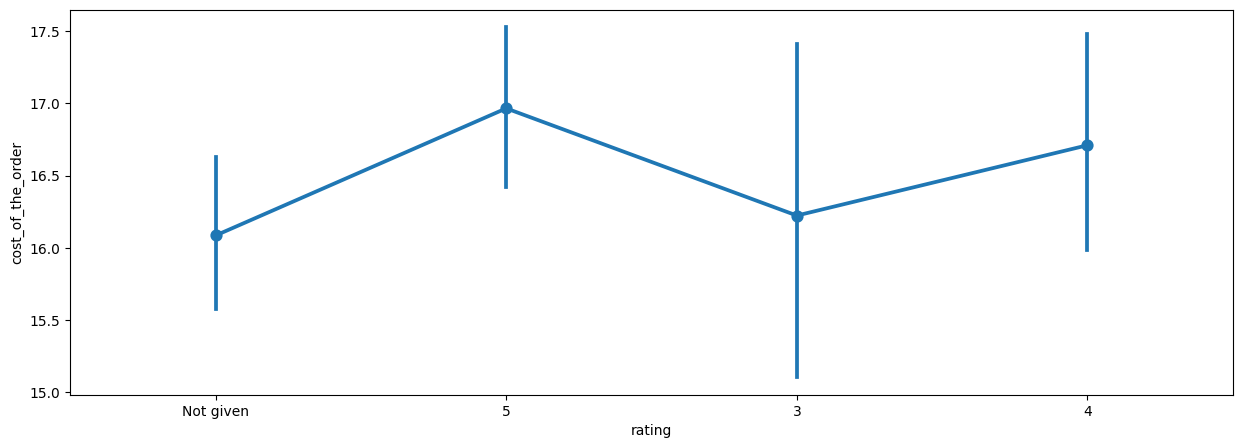

In [ ]:
# Rating vs cost of the order
plt.figure(figsize=(15, 5))
sns.pointplot(x='rating',y='cost_of_the_order',data=df)
plt.show()

Observation

* Cost of orders were high for 3 rated items

#### Correlation among variables


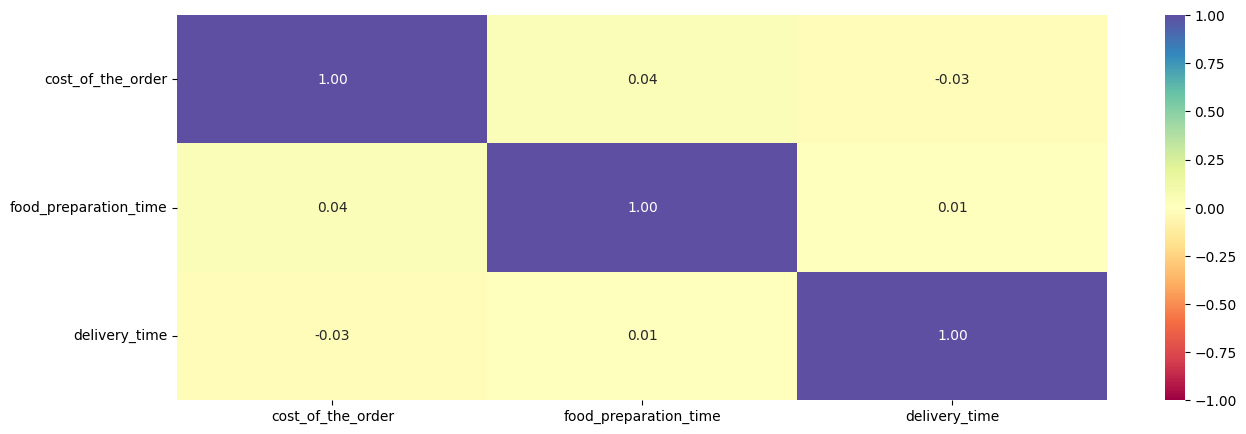

In [ ]:
# Heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation

* No correlation between cost of order, delivery time and food prepartion time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code

# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


#### Observations:
Restrurant Shake Shack is having most promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
def calculateRevenue(rev):
    if rev > 20:
        return rev*0.25
    elif rev > 5:
        return rev*0.15
    else:
        return rev*0

df['Revenue'] = df['cost_of_the_order'].apply(calculateRevenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# Get Total Revenue
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

* Revenue generated is 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Filter orders with total delivery time greater than 60 minutes
orders_above_60_minutes = df[df['total_time'] > 60]

# Calculate the percentage of such orders
percentage_above_60_minutes = (len(orders_above_60_minutes) / len(df)) * 100

print(percentage_above_60_minutes)

10.537407797681771


#### Observations:

Percentage above 60 miniutes is 10.53

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
Delivery time on weekdays are more


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Order placed on weekends are more than the order placed on weekdays
*  Ratings are not given on majority of the orders
*  Restrurant Shake Shack received most of the orders and highest revenue generated on it
*  Southern food is most costly
*  Rating 3 given on the item took most food prep time
*  Restrurant Shake Shack having most promotional offers
*  Thai cuisine having most prepartaion time
*  Approx 10.5% of orders take more than 60 minutes to get delivered from the time the order is placed

### Recommendations:

*  Delivery and food preptime need to be improved
*  Customers to be encouraged/asked for providing rating
*  Food preparation time to be reduced
*  Delivery time to be reduced from the time when order placed
*  More delivery persons should be accommodated during weekends to deliver high volume of orders
* There are around 10.55 percentage having more than 60 mins delivery, Foodhub should try to minimize to have customer dissatisfaction.
* Approx. 80% of orders are placed for American,Japanese and Chinese cuisines
Shake Shack is most popular restaurant
* Foodhub should provide some promostional offer o popular restrurants on weekdays and weekends


---